<a href="https://colab.research.google.com/github/iam-hbk/Customer-churn-prediction/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math

In [16]:
telcom = pd.read_csv(r"./drive/MyDrive/ADB_Group_Work_Data/churn-bigml-80.csv")
telcom_test = pd.read_csv(r"./drive/MyDrive/ADB_Group_Work_Data/churn-bigml-80.csv")
telcom.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


 **DATA PREPROCESSING**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Data preprocessing is the first and crucial step in your machine learning journey. In this step, we are going to convert the categorical columns into numeric ones and scale the numerical columns to have similar ranges.

##1. Convert Categorical 'Churn' Column to Numeric

Before we can perform any calculations with the "Churn" column, we need to convert it from boolean (True/False) values into numerical (1/0) values.
We're using the label encoder


<ipython-input-26-0eabab995790>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(telcom.corr(), annot=True, fmt='.2f')


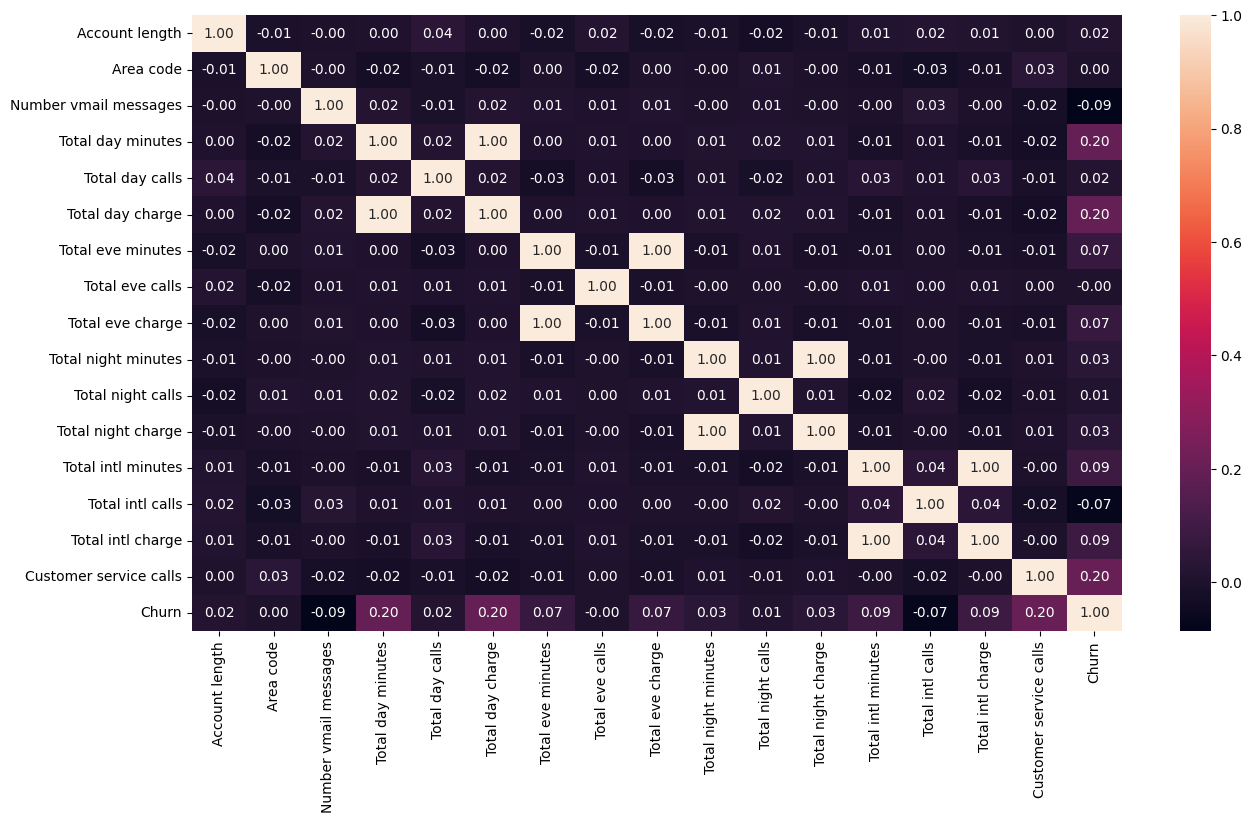

In [26]:
le = LabelEncoder()
telcom['Churn'] = le.fit_transform(telcom['Churn'])

# Correlation plot
plt.figure(figsize=(15,8))
sns.heatmap(telcom.corr(), annot=True, fmt='.2f')

#save the file
plt.savefig('correlation_matrix.png')
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


##2. Separate Feature Matrix and Target Variable
So we are seperating features from targets, the target is what we are trying to predict (churn) the features are all other variables that can cause customer churn 



In [28]:

X = telcom.drop(columns='Churn')  # all other columns are features
y = telcom['Churn']  # 'Churn' is the target


##3. Encoding Categorical Data
Step 3 involves encoding categorical data. Many machine learning models require the input data to be numerical. This means that if your data includes categorical data (like 'Yes'/'No', or 'Red'/'Green'/'Blue'), you'll need to convert these categories into numbers.

Let's take the 'International plan' column as an example. It contains 'Yes' and 'No' values, which are categories. Machine learning models can't do calculations with 'Yes' and 'No', so we need to represent these categories with numbers instead.

One way to do this is to assign each category a number, like 'Yes' = 1 and 'No' = 0. This is called label encoding.

However, label encoding can introduce a new problem. The model might assume that 'Yes' is "greater than" 'No' because 1 > 0. This doesn't make sense, because 'Yes' and 'No' aren't quantities that can be compared in size—they're just different categories.

So instead of label encoding, we can use one-hot encoding. This is where we create new columns for each category. Each of these new columns is a binary column that contains 1s and 0s, indicating whether each row belongs to that category.

After one-hot encoding, the 'International plan' column would be replaced with two new columns: 'International plan_Yes' and 'International plan_No'. If a customer has an international plan, they will have a '1' in the 'International plan_Yes' column and a '0' in the 'International plan_No' column.

The pd.get_dummies() function in pandas does this one-hot encoding for us. It converts categorical variable(s) into dummy/indicator variables.

import pandas as pd

```
# Example DataFrame
df = pd.DataFrame({
    'A': ['cat', 'dog', 'dog', 'cat', 'bird', 'bird'],
    'B': ['red', 'green', 'red', 'green', 'red', 'green']
})

# Use pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=['A', 'B'])
print(df_encoded)

```
The result would be 
```
   A_bird  A_cat  A_dog  B_green  B_red
0       0      1      0        0      1
1       0      0      1        1      0
2       0      0      1        0      1
3       0      1      0        1      0
4       1      0      0        0      1
5       1      0      0        1      0

```


In [33]:
# X has all other feature where some of them are categorical
# we encode them and reassign them to X
X = pd.get_dummies(X) 
